In [1]:
!pip install kaggle

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for kaggle: filename=kaggle-1.6.17-py3-none-any.whl size=105796 sha256=ae75a649e8c5b9d50fdf479626eabadc9f84bb8014e8dc9ee3b8ef9af93fe6a5
  Stored in directory: c:\users\agnishwar das\appdata\local\pip\cache\wheels\46\d2\26\84d0a1acdb9c6baccf7d28cf06962ec80529fe1ad938489983
Successfully built kaggle


In [3]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

The syntax of the command is incorrect.
'cp' is not recognized as an internal or external command,
operable program or batch file.
'chmod' is not recognized as an internal or external command,
operable program or batch file.


Importing Face Mask Dataset

In [ ]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 91% 149M/163M [00:00<00:00, 196MB/s]
100% 163M/163M [00:00<00:00, 181MB/s]


In [ ]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
!ls

data  face-mask-dataset.zip  sample_data


**Importing the Dependencies**

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [ ]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_334.jpg', 'with_mask_3582.jpg', 'with_mask_3689.jpg', 'with_mask_1489.jpg', 'with_mask_1983.jpg']
['with_mask_742.jpg', 'with_mask_580.jpg', 'with_mask_3094.jpg', 'with_mask_75.jpg', 'with_mask_2690.jpg']


In [ ]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_2357.jpg', 'without_mask_1924.jpg', 'without_mask_1473.jpg', 'without_mask_983.jpg', 'without_mask_2401.jpg']
['without_mask_23.jpg', 'without_mask_816.jpg', 'without_mask_30.jpg', 'without_mask_3514.jpg', 'without_mask_2629.jpg']


In [ ]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


**Creating Labels for the two class of Images**

with mask  -->  1

without mask  -->  0

In [ ]:
# create the labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [ ]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [ ]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [ ]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


**Displaying the Images**

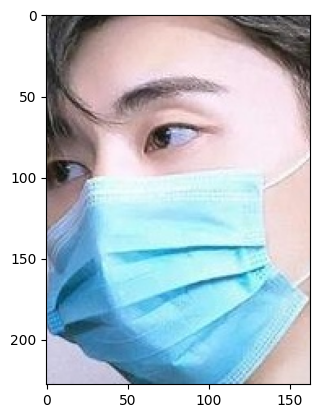

In [ ]:
# displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_1545.jpg')
imgplot = plt.imshow(img)
plt.show()

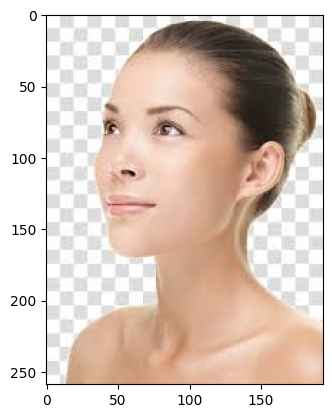

In [ ]:
# displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_2925.jpg')
imgplot = plt.imshow(img)
plt.show()

**Image Processing**

1. Resize the Images

2. Convert the images to numpy arrays

In [ ]:
# convert images to numpy arrays+

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
type(data)

list

In [ ]:
len(data)

7553

array([[[111, 107, 121],
        [128, 124, 138],
        [133, 129, 143],
        ...,
        [ 77,  78,  76],
        [107, 107, 105],
        [140, 140, 138]],

       [[126, 122, 136],
        [128, 124, 138],
        [127, 123, 137],
        ...,
        [ 62,  62,  60],
        [ 78,  78,  76],
        [100, 100,  98]],

       [[133, 129, 143],
        [123, 119, 133],
        [119, 115, 129],
        ...,
        [ 59,  58,  56],
        [ 65,  64,  62],
        [ 74,  73,  71]],

       ...,

       [[227, 216, 196],
        [230, 219, 199],
        [237, 226, 206],
        ...,
        [ 47,  47,  57],
        [ 52,  52,  63],
        [ 50,  50,  61]],

       [[233, 222, 202],
        [235, 223, 204],
        [238, 227, 209],
        ...,
        [ 56,  56,  67],
        [ 58,  58,  71],
        [ 58,  58,  70]],

       [[236, 228, 209],
        [236, 228, 209],
        [238, 229, 211],
        ...,
        [ 60,  60,  71],
        [ 61,  61,  73],
        [ 63,  63,  75]]], dtype=uint8)
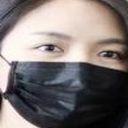

In [ ]:
data[0]

In [ ]:
type(data[0])

numpy.ndarray

In [ ]:
data[0].shape

(128, 128, 3)

In [ ]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [ ]:
type(X)

numpy.ndarray

In [ ]:
type(Y)

numpy.ndarray

In [ ]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [ ]:
print(Y)

[1 1 1 ... 0 0 0]


**Train Test Split**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [ ]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

array([[[ 84,  93,  85],
        [ 83,  92,  84],
        [ 82,  91,  84],
        ...,
        [ 49,  49,  52],
        [ 47,  47,  50],
        [ 48,  47,  50]],

       [[ 90,  98,  84],
        [ 89,  97,  83],
        [ 89,  97,  83],
        ...,
        [ 43,  43,  44],
        [ 47,  47,  47],
        [ 47,  47,  47]],

       [[ 97, 101,  88],
        [ 97, 101,  88],
        [ 97, 101,  88],
        ...,
        [ 14,  14,  12],
        [ 17,  17,  15],
        [ 20,  20,  18]],

       ...,

       [[ 26,  42,  95],
        [ 32,  48, 107],
        [ 33,  49, 114],
        ...,
        [ 18,  22,  34],
        [ 31,  17,  26],
        [ 54,  21,  26]],

       [[ 17,  32,  79],
        [ 26,  40,  92],
        [ 31,  48, 104],
        ...,
        [ 12,  22,  34],
        [ 27,  18,  27],
        [ 47,  18,  22]],

       [[ 29,  43,  90],
        [ 18,  31,  82],
        [ 23,  40,  93],
        ...,
        [ 23,  24,  33],
        [ 44,  23,  27],
        [ 65,  22,  22]]], dtype=uint8)
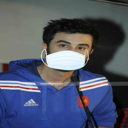

In [ ]:
X_train[0]

In [ ]:
X_train_scaled[0]

array([[[0.32941176, 0.36470588, 0.33333333],
        [0.3254902 , 0.36078431, 0.32941176],
        [0.32156863, 0.35686275, 0.32941176],
        ...,
        [0.19215686, 0.19215686, 0.20392157],
        [0.18431373, 0.18431373, 0.19607843],
        [0.18823529, 0.18431373, 0.19607843]],

       [[0.35294118, 0.38431373, 0.32941176],
        [0.34901961, 0.38039216, 0.3254902 ],
        [0.34901961, 0.38039216, 0.3254902 ],
        ...,
        [0.16862745, 0.16862745, 0.17254902],
        [0.18431373, 0.18431373, 0.18431373],
        [0.18431373, 0.18431373, 0.18431373]],

       [[0.38039216, 0.39607843, 0.34509804],
        [0.38039216, 0.39607843, 0.34509804],
        [0.38039216, 0.39607843, 0.34509804],
        ...,
        [0.05490196, 0.05490196, 0.04705882],
        [0.06666667, 0.06666667, 0.05882353],
        [0.07843137, 0.07843137, 0.07058824]],

       ...,

       [[0.10196078, 0.16470588, 0.37254902],
        [0.1254902 , 0.18823529, 0.41960784],
        [0.12941176, 0

**Building a Convolutional Neural Networks (CNN)**

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [ ]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 14s 47ms/step - acc: 0.7160 - loss: 0.6102 - val_acc: 0.9041 - val_loss: 0.2380
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - acc: 0.8829 - loss: 0.2978 - val_acc: 0.8992 - val_loss: 0.2213
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - acc: 0.9084 - loss: 0.2454 - val_acc: 0.9140 - val_loss: 0.1949
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - acc: 0.9224 - loss: 0.2085 - val_acc: 0.9190 - val_loss: 0.2056
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - acc: 0.9392 - loss: 0.1637 - val_acc: 0.9240 - val_loss: 0.1883


**Model Evaluation**

In [ ]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - acc: 0.9292 - loss: 0.1644
Test Accuracy = 0.9305095672607422


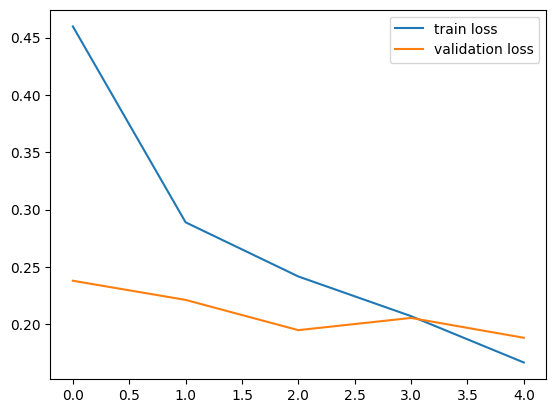

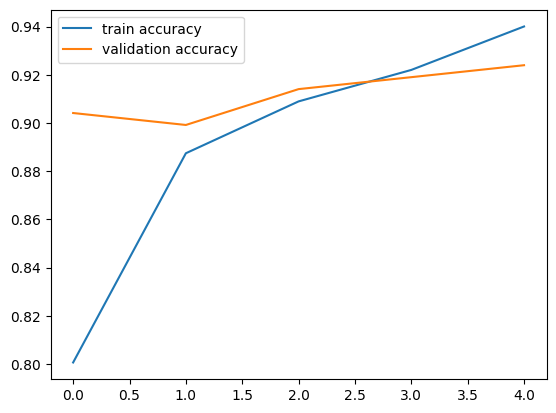

In [ ]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

**Predictive System**

Path of the image to be predicted: /content/test1.jpg


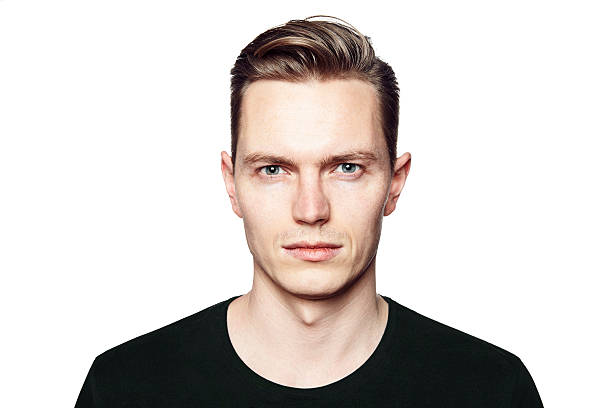

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
[[0.53820086 0.509784  ]]
0
The person in the image is not wearing a mask


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')